<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>
**N2 - Análise Exploratória - Spotify Tracks**<br/>
Alunos(as): <br/> Fabiana Luizon Martins Campos <br/>
Gustavo Florencio Lima Simião <br/>
Jackson Gomes Cerqueira <br/>
Tainara do Nascimento Casimiro <br/>
Victor César Trindade Pereira

---




In [1]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# URLs com o dataset para análise

url_spotify = "https://raw.githubusercontent.com/fabii2607/python-spotify-analyses/refs/heads/main/spotify_tracks.csv"

# **Análise Exploratória de Dados (EDA) 📊**

In [3]:
# Importando dataset do repositório do GitHub
df = pd.read_csv(url_spotify)

In [4]:
# Renomeando as colunas
df = df.rename(columns={'id': 'ID', 'name': 'Nome', 'genre': 'Gênero', 'artists': 'Artista', 'album': 'Álbum', 'popularity': 'Popularidade', 'duration_ms': 'Duração_ms', 'explicit': "Explicito"})

In [5]:
# Criar nova coluna com duração em segundos
df["Duração_s"] = df["Duração_ms"] / 1000


In [6]:
# Remover a coluna original em milissegundos
df = df.drop(columns=["Duração_ms"])

In [7]:
# Imprimindo Cabeçario
df.head()

,ID,Nome,Gênero,Artista,Álbum,Popularidade,Explicito,Duração_s
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,False,172.199
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False,172.202
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,False,144.786
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False,116.573
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,False,133.922


**Estatísticas Descritivas** 🔎

In [8]:
# Estatísticas descritivas resumidas
df.describe()

,Popularidade,Duração_s
count,6300.000000,6300.000000
mean,30.754762,202.847735
std,19.948991,121.029858
min,0.000000,30.060000
25%,16.000000,147.687000
50%,29.000000,191.607000
75%,45.000000,236.962500
max,90.000000,3601.658000


In [9]:
# Informação do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6300 non-null   object 
 1   Nome          6300 non-null   object 
 2   Gênero        6300 non-null   object 
 3   Artista       6300 non-null   object 
 4   Álbum         6300 non-null   object 
 5   Popularidade  6300 non-null   int64  
 6   Explicito     6300 non-null   bool   
 7   Duração_s     6300 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 350.8+ KB


In [10]:
# Ver quantidade de valores ausentes por coluna
missing_values = df.isnull().sum()

In [11]:
# Mostrar apenas colunas com pelo menos um valor ausente
missing_values[missing_values > 0]

,0


In [12]:
# Verificar se há linhas duplicadas
duplicados = df.duplicated()

In [13]:
# Contar o total de linhas duplicadas
total_duplicados = duplicados.sum()
print(f"Total de linhas duplicadas: {total_duplicados}")

Total de linhas duplicadas: 0


In [14]:
# Verificar tipos de dados das colunas
df.dtypes

,0
ID,object
Nome,object
Gênero,object
Artista,object
Álbum,object
Popularidade,int64
Explicito,bool
Duração_s,float64


🔥 Segundo a análise não existe nenhum valor ausente, duplicado ou inconsistências nos dados

**Gráficos** 📈

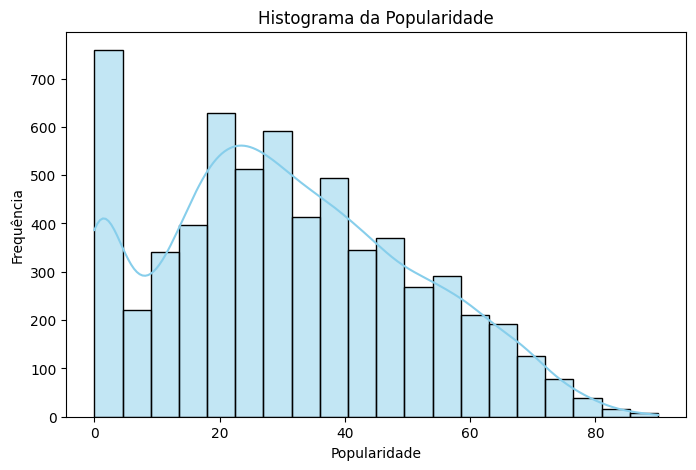

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Popularidade'], bins=20, kde=True, color='skyblue')
plt.title('Histograma da Popularidade')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()


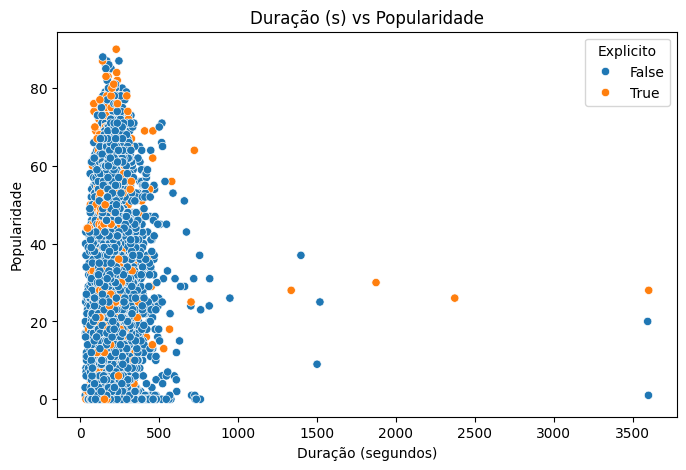

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duração_s', y='Popularidade', data=df, hue='Explicito')
plt.title('Duração (s) vs Popularidade')
plt.xlabel('Duração (segundos)')
plt.ylabel('Popularidade')
plt.legend(title='Explicito')
plt.show()

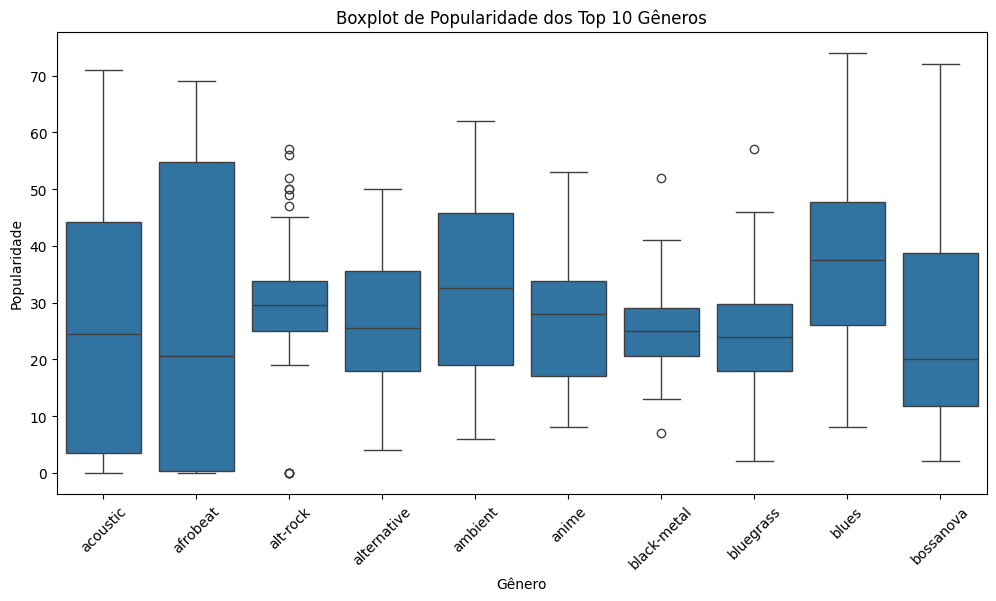

In [17]:
# Contar os gêneros e pegar os top 10
top10_generos = df['Gênero'].value_counts().nlargest(10).index

# Filtrar o dataframe para esses gêneros
df_top10 = df[df['Gênero'].isin(top10_generos)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Gênero', y='Popularidade', data=df_top10,
            order=top10_generos)
plt.title('Boxplot de Popularidade dos Top 10 Gêneros')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-f0eeae4ec4f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artistas.values, y=top_artistas.index, palette='viridis')


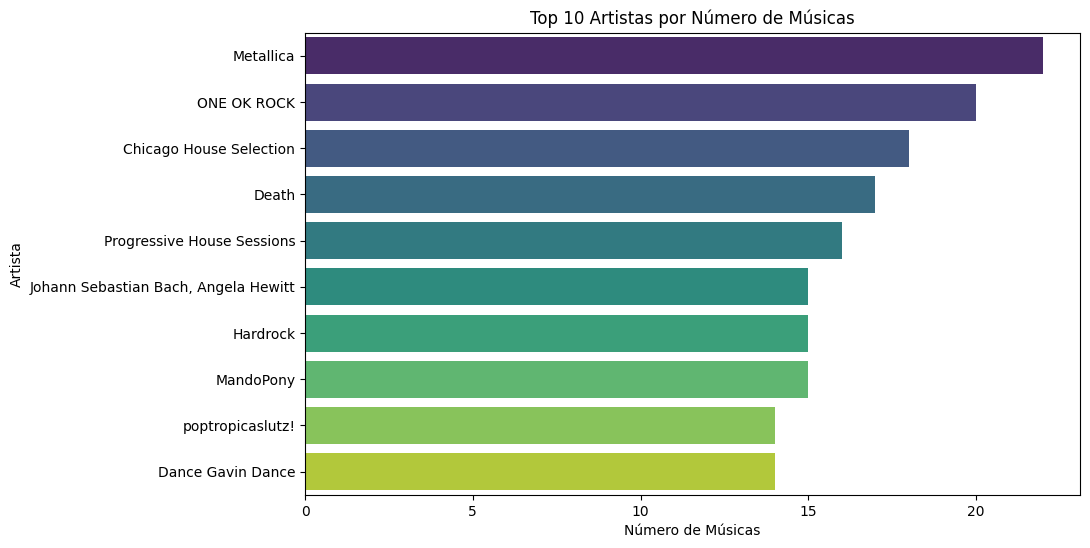

In [18]:
top_artistas = df['Artista'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_artistas.values, y=top_artistas.index, palette='viridis')
plt.title('Top 10 Artistas por Número de Músicas')
plt.xlabel('Número de Músicas')
plt.ylabel('Artista')
plt.show()

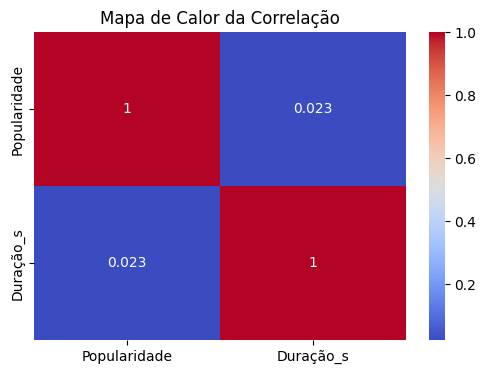

In [19]:
plt.figure(figsize=(6,4))
corr = df[['Popularidade', 'Duração_s']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Correlação')
plt.show()


# **Formulação de Perguntas**

## Faixas explícitas tendem a ser mais ou menos populares?

In [20]:
print(df.columns)

Index(['ID', 'Nome', 'Gênero', 'Artista', 'Álbum', 'Popularidade', 'Explicito',
       'Duração_s'],
      dtype='object')


In [21]:
popularidade_explicito = df.groupby('Explicito')['Popularidade'].mean()

In [22]:
print('Popularidade média das faixas explícitas (Sim/Não):')
print(popularidade_explicito)

Popularidade média das faixas explícitas (Sim/Não):
Explicito
False    30.073639
True     33.667504
Name: Popularidade, dtype: float64


<ipython-input-23-503cb74fc3d7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Explicito', y='Popularidade', data=df, ci=None, palette='Set2')
<ipython-input-23-503cb74fc3d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Explicito', y='Popularidade', data=df, ci=None, palette='Set2')


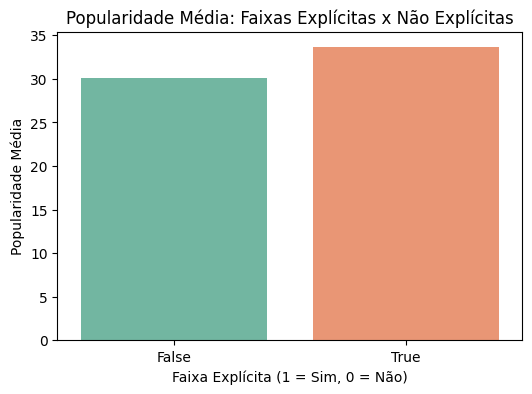

In [23]:
# Visualização do gráfico
plt.figure(figsize=(6,4))
sns.barplot(x='Explicito', y='Popularidade', data=df, ci=None, palette='Set2')
plt.title('Popularidade Média: Faixas Explícitas x Não Explícitas')
plt.xlabel('Faixa Explícita (1 = Sim, 0 = Não)')
plt.ylabel('Popularidade Média')
plt.show()

A diferença não é muito grande isso indica que ser explícita não é o principal fator de sucesso de uma música, mas as faixas explícitas são ligeiramente mais populares, em média.

## Existe correlação entre as variáveis duração e popularidade?

In [24]:
correlacao = df['Duração_s'].corr(df['Popularidade'])

In [25]:
print(f"Correlação entre Duração e Popularidade: {correlacao:.2f}")

Correlação entre Duração e Popularidade: 0.02


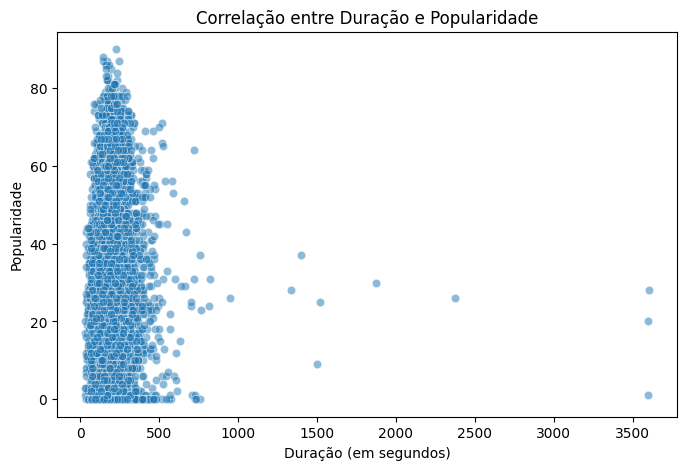

In [26]:
# Visualizar a relação com gráfico de dispersão
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duração_s', y='Popularidade', data=df, alpha=0.5)
plt.title('Correlação entre Duração e Popularidade')
plt.xlabel('Duração (em segundos)')
plt.ylabel('Popularidade')
plt.show()

Correlação muito baixa entre duração e popularidade, isso indica que a duração da música não influencia significativamente a popularidade no Spotify.

## Qual é a distribuição de duração das músicas no Spotify?

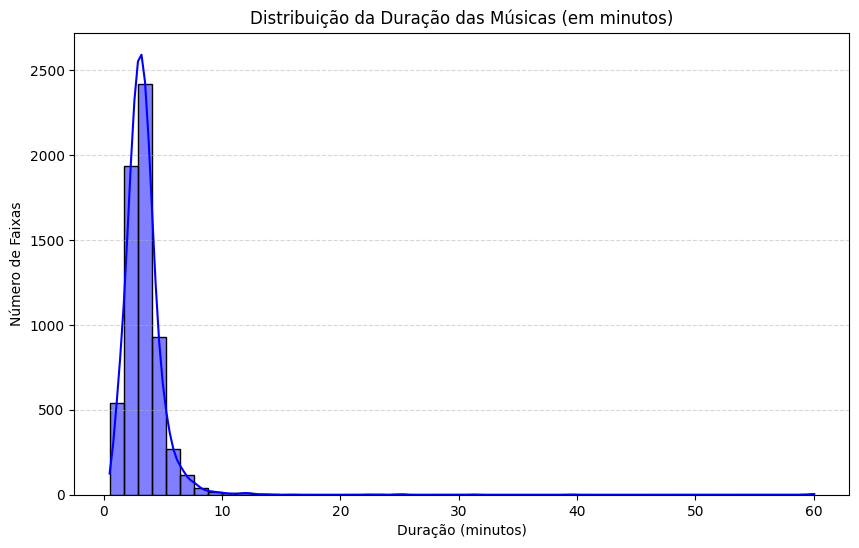

count    6300.000000
mean        3.380796
std         2.017164
min         0.501000
25%         2.461450
50%         3.193450
75%         3.949375
max        60.027633
Name: Duração_min, dtype: float64


In [27]:

# Converter duração de segundos para minutos
df['Duração_min'] = df['Duração_s'] / 60

# Plotar a distribuição de duração
plt.figure(figsize=(10,6))
sns.histplot(df['Duração_min'], bins=50, kde=True, color='blue')
plt.title('Distribuição da Duração das Músicas (em minutos)')
plt.xlabel('Duração (minutos)')
plt.ylabel('Número de Faixas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Estatísticas básicas
print(df['Duração_min'].describe())

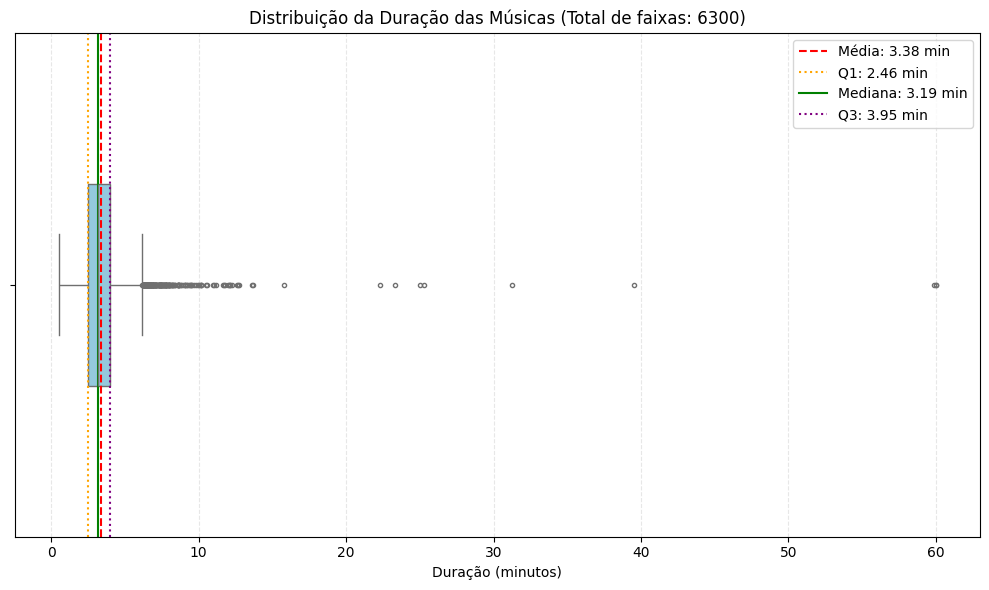

In [28]:
# Calculo estatísticas
total_faixas = len(df)
media_duracao = df['Duração_min'].mean()
q1 = df['Duração_min'].quantile(0.25)
mediana = df['Duração_min'].median()
q3 = df['Duração_min'].quantile(0.75)

# Gráfico
plt.figure(figsize=(10,6))

# Boxplot da duração
sns.boxplot(x=df['Duração_min'], color='skyblue', fliersize=3, width=0.4)

# Marcar a média no gráfico
plt.axvline(media_duracao, color='red', linestyle='--', label=f'Média: {media_duracao:.2f} min')

# Marcar Q1, Mediana e Q3
plt.axvline(q1, color='orange', linestyle=':', label=f'Q1: {q1:.2f} min')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f} min')
plt.axvline(q3, color='purple', linestyle=':', label=f'Q3: {q3:.2f} min')

# Títulos e legendas
plt.title(f'Distribuição da Duração das Músicas (Total de faixas: {total_faixas})')
plt.xlabel('Duração (minutos)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Quais são as faixas com a menor e maior duração?

In [29]:
# Faixa mais curta
faixa_mais_curta = df.loc[df['Duração_min'].idxmin()]
print(f"🎵 Faixa mais curta:")
print(f"Nome: {faixa_mais_curta['Nome']}")
print(f"Artista: {faixa_mais_curta['Artista']}")
print(f"Gênero: {faixa_mais_curta['Gênero']}")
print(f"Duração: {faixa_mais_curta['Duração_min']:.2f} minutos\n")

# Faixa mais longa
faixa_mais_longa = df.loc[df['Duração_min'].idxmax()]
print(f"🎵 Faixa mais longa:")
print(f"Nome: {faixa_mais_longa['Nome']}")
print(f"Artista: {faixa_mais_longa['Artista']}")
print(f"Gênero: {faixa_mais_longa['Gênero']}")
print(f"Duração: {faixa_mais_longa['Duração_min']:.2f} minutos")

🎵 Faixa mais curta:
Nome: Rockabilly
Artista: Fito Paez
Gênero: rockabilly
Duração: 0.50 minutos

🎵 Faixa mais longa:
Nome: Afrobeat 2023 Mixtape
Artista: Dj funkybee
Gênero: afrobeat
Duração: 60.03 minutos
